In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
import pandas_ta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [135]:
df = pd.read_csv('AAPL.csv')
print(df)
df.head()
print(df.describe())

            Date        Open        High         Low       Close   Adj Close   
0     2013-07-16   15.232857   15.382500   15.148929   15.364286   13.339229  \
1     2013-07-17   15.346429   15.436429   15.293571   15.368214   13.342637   
2     2013-07-18   15.477857   15.531071   15.378929   15.420000   13.387598   
3     2013-07-19   15.467857   15.499286   15.155357   15.176786   13.176443   
4     2013-07-22   15.337857   15.348214   15.195357   15.225357   13.218610   
...          ...         ...         ...         ...         ...         ...   
2512  2023-07-10  189.259995  189.990005  187.039993  188.610001  188.610001   
2513  2023-07-11  189.160004  189.300003  186.600006  188.080002  188.080002   
2514  2023-07-12  189.679993  191.699997  188.470001  189.770004  189.770004   
2515  2023-07-13  190.500000  191.190002  189.779999  190.539993  190.539993   
2516  2023-07-14  190.229996  191.179993  189.630005  190.690002  190.690002   

         Volume  
0     216538000  
1  

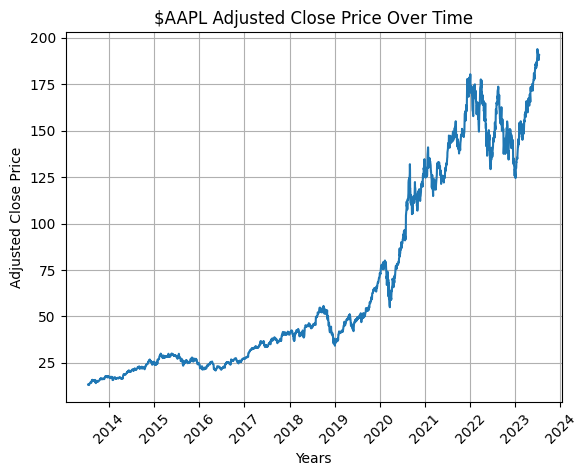

In [136]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

plt.plot(df.index, df['Adj Close'])
plt.xlabel('Years')
plt.ylabel('Adjusted Close Price')
plt.title('$AAPL Adjusted Close Price Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [137]:
df.ta.ema(close='Adj Close', length=10, append=True)

Date
2013-07-16           NaN
2013-07-17           NaN
2013-07-18           NaN
2013-07-19           NaN
2013-07-22           NaN
                 ...    
2023-07-10    189.633484
2023-07-11    189.351033
2023-07-12    189.427209
2023-07-13    189.629534
2023-07-14    189.822346
Name: EMA_10, Length: 2517, dtype: float64

In [138]:
print(df.head(10))

                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-07-16  15.232857  15.382500  15.148929  15.364286  13.339229  216538000  \
2013-07-17  15.346429  15.436429  15.293571  15.368214  13.342637  198990400   
2013-07-18  15.477857  15.531071  15.378929  15.420000  13.387598  218878800   
2013-07-19  15.467857  15.499286  15.155357  15.176786  13.176443  268721600   
2013-07-22  15.337857  15.348214  15.195357  15.225357  13.218610  207796400   
2013-07-23  15.214286  15.248571  14.953929  14.963929  12.991637  369395600   
2013-07-24  15.676071  15.878214  15.545000  15.732500  13.658909  591936800   
2013-07-25  15.739286  15.764286  15.564643  15.660714  13.596586  229493600   
2013-07-26  15.546429  15.751429  15.512143  15.749643  13.673793  200152400   
2013-07-29  15.742857  16.071072  15.721429  15.992500  13.884644  248057600   

               EMA_10  
Date           

In [139]:
df = df.iloc[10:]
print(df.head(10))

                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-07-30  16.070000  16.326786  16.043928  16.190001  14.056111  309422400  \
2013-07-31  16.249643  16.333570  16.051071  16.161785  14.031612  322957600   
2013-08-01  16.276787  16.314285  16.187857  16.309999  14.160293  206250800   
2013-08-02  16.357500  16.530357  16.309286  16.519285  14.341996  274783600   
2013-08-05  16.596071  16.809643  16.505358  16.766071  14.556252  318855600   
2013-08-06  16.715000  16.853214  16.506071  16.616072  14.426025  334857600   
2013-08-07  16.564285  16.678572  16.491785  16.606428  14.417655  298858000   
2013-08-08  16.566429  16.575001  16.355356  16.464643  14.388938  255777200   
2013-08-09  16.379999  16.445000  16.201786  16.230356  14.184183  266865200   
2013-08-12  16.316429  16.737499  16.308214  16.691429  14.587135  364434000   

               EMA_10  
Date           

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)

print(X_test.describe())
print(X_train.describe())

        Adj Close
count  502.000000
mean    66.877742
std     51.747884
min     14.049041
25%     26.098813
50%     40.813362
75%    121.530991
max    192.460007
         Adj Close
count  2005.000000
mean     68.993759
std      53.225842
min      14.031612
25%      25.948093
50%      43.226734
75%     123.403893
max     193.970001


In [141]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.99415516]]
Mean Absolute Error: 1.1916823226022075
Coefficient of Determination: 0.998533614140691


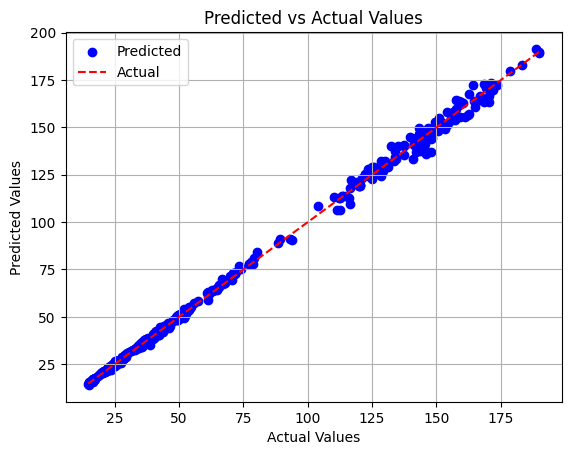

In [142]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

In [143]:
y_test.head()

,EMA_10
Date,
2018-11-27,43.899769
2019-09-11,51.999098
2017-06-13,35.501190
2016-09-15,25.289943
2015-04-09,28.334163


In [144]:
actual_values = y_test['EMA_10'].to_numpy().flatten()
predicted_values = y_pred.flatten()

comparison_df = pd.DataFrame({'Actual Adj Close': actual_values, 'Predicted Adj Close': predicted_values})
print(comparison_df)

     Actual Adj Close  Predicted Adj Close
0           43.899769            41.770851
1           51.999098            54.215778
2           35.501190            34.380341
3           25.289943            26.760950
4           28.334163            28.438217
..                ...                  ...
497         70.831413            72.305192
498         40.812845            39.816691
499        140.983747           133.430422
500         36.715001            36.724493
501        116.033443           112.896558

[502 rows x 2 columns]
